# **DATA 622 Final Project**

Assignment:
- Choose a dataset
You get to decide which dataset you want to work on. The data set must be different from the ones used in previous homeworks You can work on a problem from your job, or something you are interested in. You may also obtain a dataset from sites such as Kaggle, Data.Gov, Census Bureau, USGS or other open data portals. 
- Select one of the methodologies studied in weeks 1-10, and another methodology from weeks 11-15 to apply in the new dataset selected.
- To complete this task:. 
    - Describe the problem you are trying to solve.
    - Describe your datases and what you did to prepare the data for analysis. 
    - Methodologies you used for analyzing the data
    - What's the purpose of the analysis performed
    - Make your conclusions from your analysis. Please be sure to address the business impact (it could be of any domain) of your solution.

Deliverable:
- Your final presentation (essay or video) should include:
    - The traditional R file or Python file and essay,
    - An Essay (minimum 500 word document) or Video ( 5 to 8 minutes recording). Include the execution and explanation of your code. The video can be recorded on any platform of your choice (Youtube, Free Cam).

## **1. Setup and Overview**

For this project, I used the [Bank Customer Information and Marketing Response](https://www.kaggle.com/datasets/zain280/bank-customer-information-and-marketing-response) dataset downloaded from Kaggle. The website describes the data as follows:

> "This dataset contains information about bank customers and their responses to marketing campaigns. The dataset includes demographic and financial characteristics of customers, such as age, job, marital status, education level, and balance in their accounts. Additionally, it includes information about their response to marketing campaigns, such as whether they subscribed to a term deposit (yes/no) and the outcome of the marketing campaign (success/failure)."

The ultimate goal of this project will be to determine if the individual actually responded to the marketing information or not. This is a common problem in the marketing domain, where the goal is to maximize the conversion of marketing leads and get them to take an action. Ultimately, this type of project would be used to develop a propensity score to make a determination if it makes sense to send out marketing content to a specific group of prospects or customers, in order to determine if it is worth the cost.

The main steps involved in this project will be:
1. Exploratory data analysis
2. Feature Engineering
3. Machine Learning Model Training and Evaluation

Ultimately the problem of predicting which individuals are likely to respond to the marketing can be considered a supervised classification problem. However, it could be of interest to develop a profile of the different types of users, and thus I will also include an unsupervised model to explore what different customer profiles exist within the data. 

In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
import datetime as dt

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
import numpy as np

In [634]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC,NuSVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.metrics import accuracy_score, class_likelihood_ratios, classification_report, confusion_matrix

In [330]:
responses_raw = pd.read_csv('bank.csv')

## **2. Analysis**



### 2.1 Exploratory Analysis

In [251]:
data_copy = responses_raw.copy()

In [253]:
data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Here we see that there are 4500 rows of data - with 17 different features. The features are categorical and numeric

In [419]:
data_copy.shape

(4521, 17)

In [260]:
data_copy.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In looking at the numeric data, we see that several of the variables - balance, duration, pdays, campaign and previous - all appear to be right skewed - as evidenced by the placement of their mean relative to the different percentials in the data. 

In [255]:
data_copy.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


#### 2.1.1 Plot categorical variables

Job

In [455]:
job_counts = pd.DataFrame(data_copy['job'].value_counts()).reset_index()

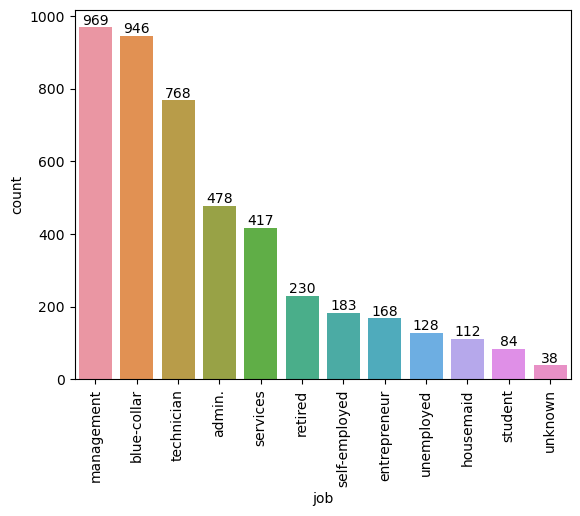

In [456]:
bar = sns.barplot(data=job_counts, x='job',y='count')

for i in bar.containers:
    bar.bar_label(i)
plt.xticks(rotation=90)


plt.show()

In [ ]:
pd.crosstab(responses_raw['job'], responses_raw['y'],normalize='index')

y,no,yes
job,,
admin.,0.878661,0.121339
blue-collar,0.927061,0.072939
entrepreneur,0.910714,0.089286
housemaid,0.875000,0.125000
management,0.864809,0.135191
retired,0.765217,0.234783
self-employed,0.890710,0.109290
services,0.908873,0.091127
student,0.773810,0.226190


Marital

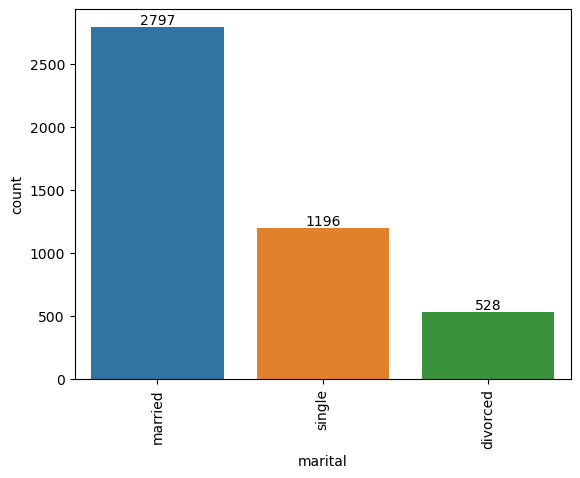

In [461]:
marital_counts = pd.DataFrame(data_copy['marital'].value_counts()).reset_index()
bar = sns.barplot(data=marital_counts, x='marital',y='count')

for i in bar.containers:
    bar.bar_label(i)
plt.xticks(rotation=90)


plt.show()

In [ ]:
pd.crosstab(responses_raw['marital'], responses_raw['y'],normalize='index')

y,no,yes
marital,,
divorced,0.854167,0.145833
married,0.900965,0.099035
single,0.860368,0.139632


Education

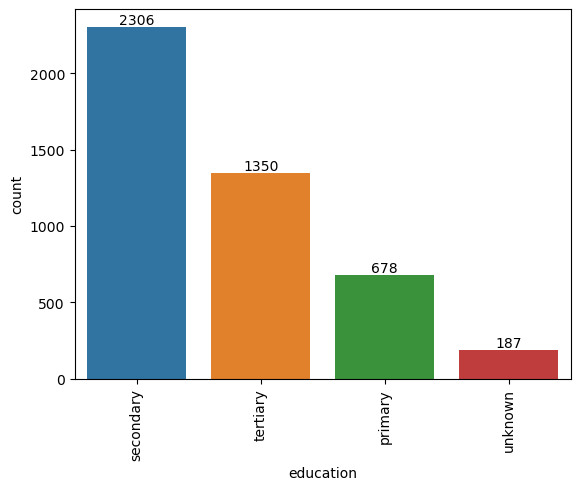

In [462]:
education_counts = pd.DataFrame(data_copy['education'].value_counts()).reset_index()
bar = sns.barplot(data=education_counts, x='education',y='count')

for i in bar.containers:
    bar.bar_label(i)
plt.xticks(rotation=90)


plt.show()

In [ ]:
pd.crosstab(responses_raw['education'], responses_raw['y'],normalize='index')

y,no,yes
education,,
primary,0.905605,0.094395
secondary,0.893755,0.106245
tertiary,0.857037,0.142963
unknown,0.898396,0.101604


Housing

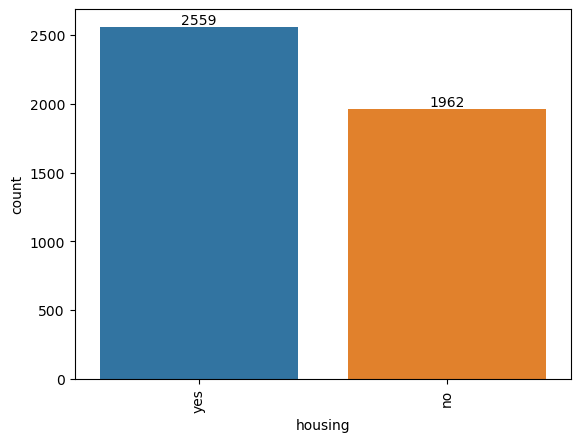

In [463]:
housing_counts = pd.DataFrame(data_copy['housing'].value_counts()).reset_index()
bar = sns.barplot(data=housing_counts, x='housing',y='count')

for i in bar.containers:
    bar.bar_label(i)
plt.xticks(rotation=90)


plt.show()

In [ ]:
pd.crosstab(responses_raw['housing'], responses_raw['y'],normalize='index')

y,no,yes
housing,,
no,0.846585,0.153415
yes,0.914029,0.085971


Loan

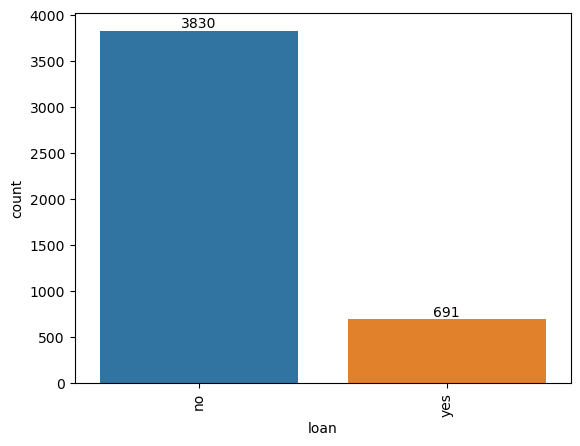

In [465]:
loan_counts = pd.DataFrame(data_copy['loan'].value_counts()).reset_index()
bar = sns.barplot(data=loan_counts, x='loan',y='count')

for i in bar.containers:
    bar.bar_label(i)
plt.xticks(rotation=90)


plt.show()

In [466]:
pd.crosstab(responses_raw['loan'], responses_raw['y'],normalize='index')

y,no,yes
loan,,
no,0.875196,0.124804
yes,0.937771,0.062229


Contact

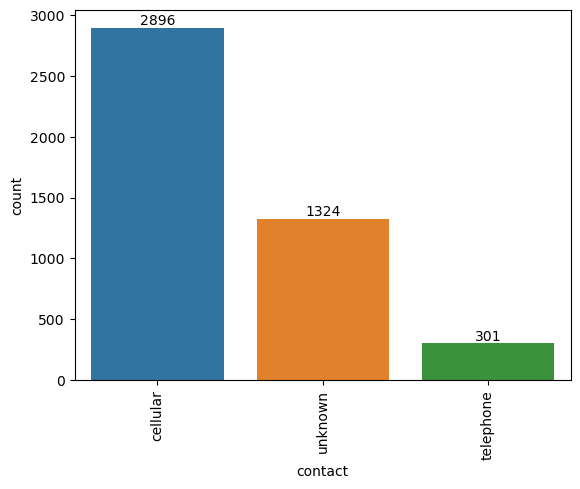

In [467]:
contact_counts = pd.DataFrame(data_copy['contact'].value_counts()).reset_index()
bar = sns.barplot(data=contact_counts, x='contact',y='count')

for i in bar.containers:
    bar.bar_label(i)
plt.xticks(rotation=90)


plt.show()

In [ ]:
pd.crosstab(responses_raw['contact'], responses_raw['y'],normalize='index')

y,no,yes
contact,,
cellular,0.856354,0.143646
telephone,0.853821,0.146179
unknown,0.953927,0.046073


#### 2.1.2 Plot continuous variables

Age

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


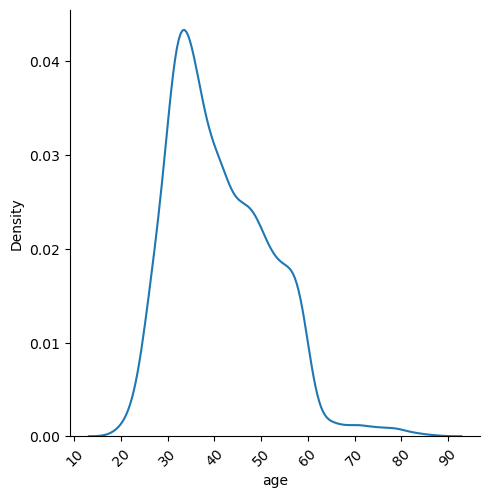

In [477]:
sns.displot(data_copy, x='age',kind='kde')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


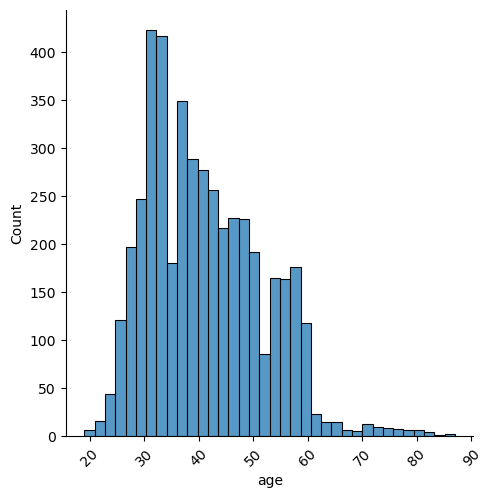

In [478]:
sns.displot(data_copy, x='age',kind='hist')
plt.xticks(rotation=45)
plt.show()

Balance

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


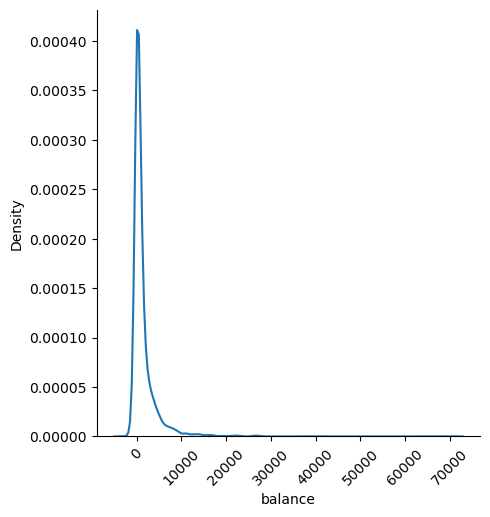

In [473]:
sns.displot(data_copy, x='balance',kind='kde')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


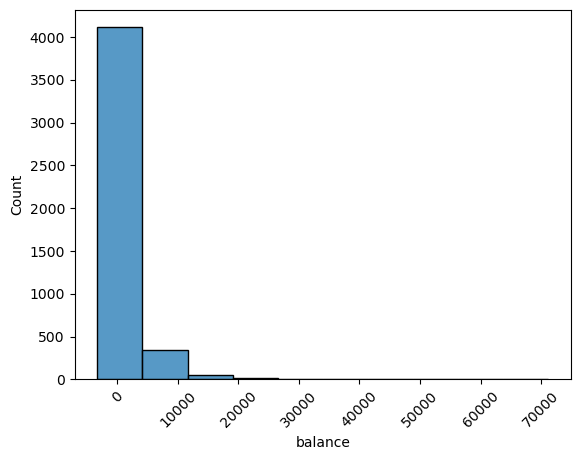

In [475]:
sns.histplot(data_copy, x='balance',bins=10)
plt.xticks(rotation=45)
plt.show()

Duration

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


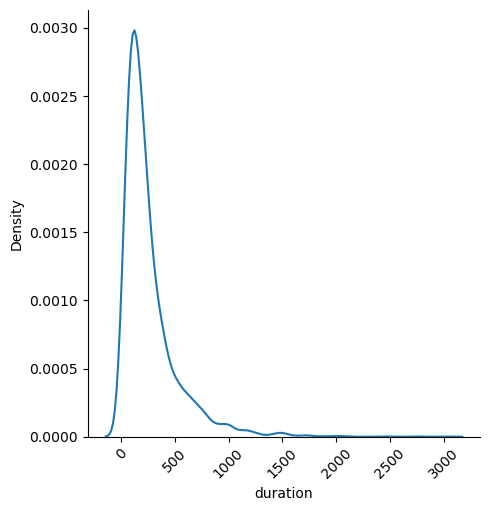

In [479]:
sns.displot(data_copy, x='duration',kind='kde')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


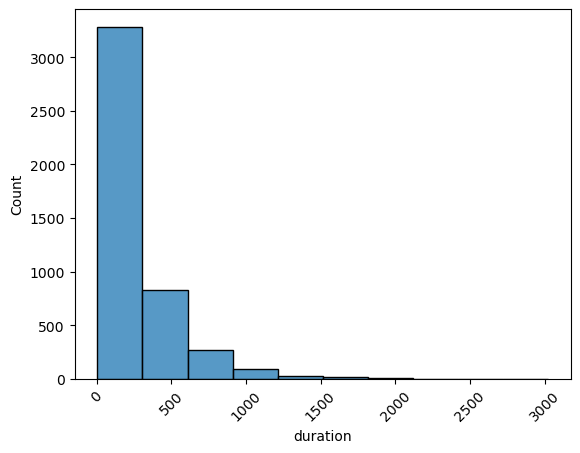

In [480]:
sns.histplot(data_copy, x='duration',bins=10)
plt.xticks(rotation=45)
plt.show()

P Days

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


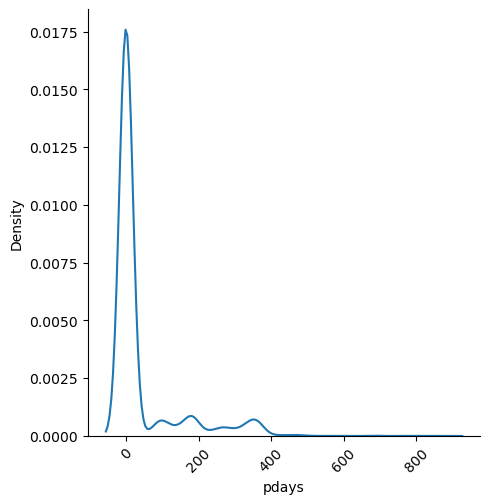

In [481]:
sns.displot(data_copy, x='pdays',kind='kde')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


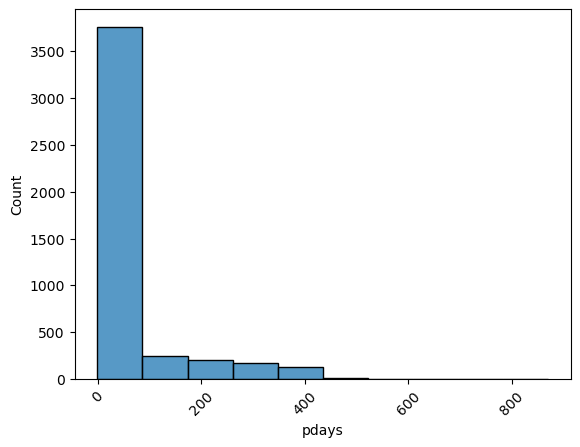

In [482]:
sns.histplot(data_copy, x='pdays',bins=10)
plt.xticks(rotation=45)
plt.show()

Campign

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


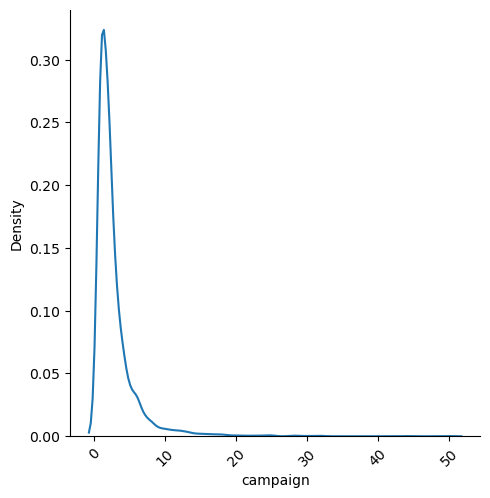

In [483]:
sns.displot(data_copy, x='campaign',kind='kde')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


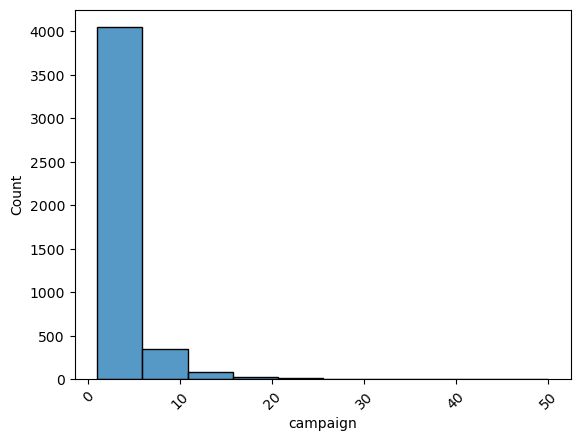

In [484]:
sns.histplot(data_copy, x='campaign',bins=10)
plt.xticks(rotation=45)
plt.show()

Transform balance

In [134]:
X_balance = np.array(X_raw['balance']).reshape(-1,1)

In [137]:
transformer = PowerTransformer()
balance_new = transformer.fit_transform(X_balance)

In [149]:
X_balance_transformed = pd.DataFrame(balance_new)[0]

Transform duration

In [154]:
X_duration = np.array(X_raw['duration']).reshape(-1,1)

In [156]:
transformer = PowerTransformer()
duration_new = transformer.fit_transform(X_duration)

In [157]:
X_duration_transformed = pd.DataFrame(duration_new)[0]

<Axes: ylabel='Frequency'>

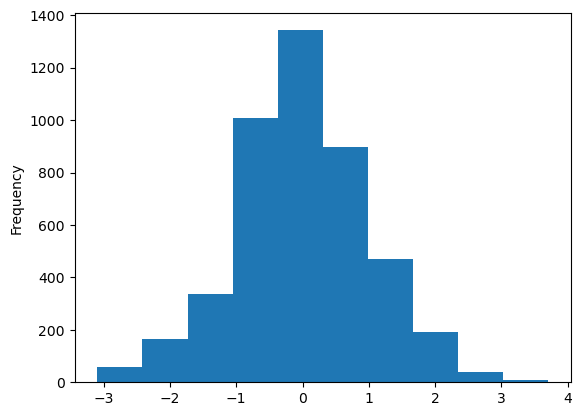

In [158]:
X_duration_transformed.plot.hist()

Transform campaign

In [182]:
X_campaign = np.array(X_raw['campaign']).reshape(-1,1)

In [183]:
transformer = PowerTransformer()
campaign_new = transformer.fit_transform(X_campaign)

In [184]:
X_campaign_transformed = pd.DataFrame(campaign_new)[0]

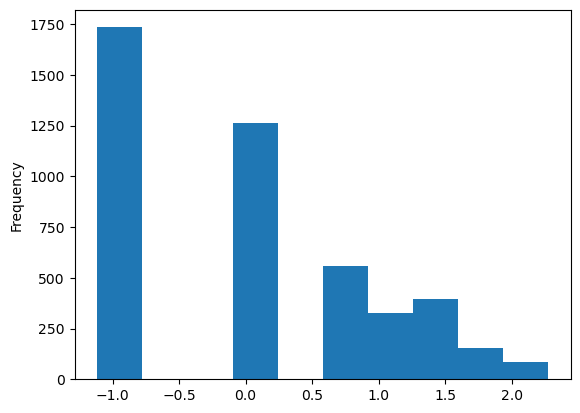

In [758]:
X_campaign_transformed.plot.hist()
plt.show()

## **3. Machine Learning**

The first step of the machine learning portion will be to do some feature engineering in order to prepare the data for use in our models. Some of the key steps that will be included involve:

1. The response variables are imbalanced, with 4000 no responses and 500 yes responses. If the data is not updated to be balanced, this could create a model that is biased towards "no" responses, simply because of the amount of training data that it is trained on. To address this, we will use upsampling in order to increase the number of "no" responese that is included in the dataset. Also, this allows us to not lose any of the information in the data that we do have.

2. Next the balance and duration variables were transformed using a power transformation to convert them into normally distributed variables for use in our model. Since the models used were mostly parametric models, having a normally distributed variables were an important aspect of the feature engineering

3. The age variable was binned into groups going from 0 to 80. This resulted in 5 different bins

4. The categorical variables (which included the binned age variable) was converted using one-hot encoding. This took the different values of a specific categorical feature and converted the value to 1 if the record had that feature and set it to 0 otherwise.

5. For the binary variables in our feature dataset, the variable was converted to a 0 or 1

6. Finally, the response variable was also converted to a 0 or 1 depending on if the response was a "yes" or "no" 



### **3.1 Feature Engineering**

In [697]:
model_raw = responses_raw.copy()

In [698]:
model_raw['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

#### **3.1.1 Upsampling**

We begin the preparation of the data for modeling training and evaluation, by upsampling the data in order to ensure that we have a balanced dataset that has an equal amount of "yes" respondents as we have "no" responsdents. In this case, this was done by separating the yes and no respondces from the full dataset and then generating "synthetic" responses from the "yes" dataset (via sampling) and then ultimately appending those back onto our original dataset

In [699]:
model_raw_no = model_raw.loc[model_raw['y'] == 'no'].copy()
model_raw_yes = model_raw.loc[model_raw['y'] == 'yes'].copy()

In [700]:
model_raw_yes_upsample = model_raw_yes.sample(n=len(model_raw_no), replace=True, random_state=1211)

In [701]:
model_raw_upsample = pd.concat([model_raw_no, model_raw_yes_upsample],axis=0).reset_index(drop=True)

In [702]:
#model_data_new = model_raw_upsample.sample(frac=1).reset_index(drop=True).copy()
model_data_new = model_raw_upsample.copy()

#### **3.1.2 Transformations**

Given the highly skewed nature of the balance data, we performed transformations on both the balance feature as well as the duration feature to generate a more normally distributed feature

Transform balance

In [703]:
balance = np.array(model_data_new['balance']).reshape(-1,1)
transformer = PowerTransformer()
balance_new = transformer.fit_transform(balance)
balance_transformed = pd.DataFrame(balance_new)[0]

Transform duration

In [704]:
duration = np.array(model_data_new['duration']).reshape(-1,1)
transformer = PowerTransformer()
duration_new = transformer.fit_transform(duration)
duration_transformed = pd.DataFrame(duration_new)[0]

#### **3.1.3 Bin the age data**

Rather than use age as a continous variable, it was binned and converted into a categorical variable. 

In [705]:
bins = [0,20,40,60,80,100]
model_data_new['age_binned'] = pd.cut(model_data_new['age'],bins=bins)

#### **3.1.4 Converting Categorical Variables**

Now that we have the overall dataset in the right shape and we have the right variables, we are going to do some encoding of our feature variables and our dependent variable - so that our categorical variables are represented numerically. We will do this by using one-hot encoding for the categorical variables and then for several of our binary variables we will use binary encoding

We begin by separating the feature variables from the dependent variable

In [706]:
X_raw = model_data_new.drop('y', axis=1)
y_raw = model_data_new['y']

Here we are isolating the multi-class categorical variables

In [707]:
X_categorical = X_raw.loc[:,['job','marital','education','contact','poutcome','age_binned']]

In [708]:
X_categorical.shape

(8000, 6)

In [709]:
label_encoder = OneHotEncoder()
label_encoder.fit(X_categorical)
X_categorical = label_encoder.transform(X_categorical).toarray()

In [710]:
X_categorical = pd.DataFrame(X_cat_transformed, columns=label_encoder.get_feature_names_out())

In [711]:
X_categorical

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,"age_binned_(0, 20]","age_binned_(20, 40]","age_binned_(40, 60]","age_binned_(60, 80]","age_binned_(80, 100]"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Here we are focusing on binary encoding for the ***default, housing, and loan*** variables. 

In [712]:
X_binary = X_raw.loc[:,['default','housing','loan']]

In [713]:
default_binarized = pd.Series(encoder.fit_transform(X_binary['default']))
housing_binarized = pd.Series(encoder.fit_transform(X_binary['housing']))
loan_binarized = pd.Series(encoder.fit_transform(X_binary['loan']))

In [714]:
X_binary = pd.concat([default_binarized,housing_binarized,loan_binarized],axis=1).set_axis(['default','housing','loan'], axis='columns')

In [715]:
X_binary

,default,housing,loan
0,0,0,0
1,0,1,1
2,0,1,0
3,0,1,1
4,0,1,0
...,...,...,...
7995,0,1,0
7996,0,0,1
7997,0,0,0
7998,0,0,0


Encode Response Variable

In [716]:
encoder = LabelEncoder()
y_new = encoder.fit_transform(y_raw)

In [717]:
pd.Series(y_new).value_counts()

0    4000
1    4000
Name: count, dtype: int64

#### **3.1.5 Create combined features dataset**
Now we will begin to combine the data together into a single features vector

In [718]:
X_transformed = pd.concat([balance_transformed,duration_transformed],axis=1).set_axis(['balance_transformed','duration_transformed'], axis='columns')

In [719]:
X_transformed

,balance_transformed,duration_transformed
0,0.274342,-1.232414
1,1.287272,-0.265684
2,0.109584,-0.442138
3,0.157855,-0.368520
4,-0.508426,-0.237785
...,...,...
7995,-0.073887,-0.442138
7996,-0.233391,1.029436
7997,0.217101,-0.030191
7998,-0.365668,-0.442138


In [720]:
X_model = pd.concat([X_categorical,X_binary,X_transformed],axis=1)

In [721]:
X_model

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,"age_binned_(0, 20]","age_binned_(20, 40]","age_binned_(40, 60]","age_binned_(60, 80]","age_binned_(80, 100]",default,housing,loan,balance_transformed,duration_transformed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,0,0.274342,-1.232414
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,1,1.287272,-0.265684
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,0,0.109584,-0.442138
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,1,0.157855,-0.368520
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,1,0,-0.508426,-0.237785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,0,-0.073887,-0.442138
7996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,1,-0.233391,1.029436
7997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,0,0.217101,-0.030191
7998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,0,-0.365668,-0.442138


### **3.2 Training and Test Data**

Now for developing our models, we will create training and test datasets, where we will use a 33% holdout size for our test dataset

In [722]:
X_model.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,"age_binned_(0, 20]","age_binned_(20, 40]","age_binned_(40, 60]","age_binned_(60, 80]","age_binned_(80, 100]",default,housing,loan,balance_transformed,duration_transformed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,0,0,0.274342,-1.232414
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,1,1.287272,-0.265684
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,0,0.109584,-0.442138
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0,1,1,0.157855,-0.368520
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,1,0,-0.508426,-0.237785


In [723]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_new, test_size=0.33, random_state=1211)

### **3.3 Model Training and Evaluation (Week 1-10 Models)**

The problem that we are trying to solve would be considered a supervised learning - classification problem. Based on this, I decided to train several different models that are designed for this purpose to achieve that goal. 

1. Logistic Regression
2. Random Forest
3. SVM
4. KNN 

#### **3.3.1 Logistic Regression**

In [724]:
clf1 = LogisticRegression(random_state=1211)
clf1.fit(X_train,y_train)
clf1.score(X_test,y_test)

0.8087121212121212

#### **3.3.2 Random Forest Classifier**

I chose to use a Random Forest classifier because it generally does a good job of taking data that has linear decision boundaries and can generally come back with high accuracy results. However, one of the downsides of the Random Forest classifier is that we are unable to interpret the model and use it for providing actual instructions for future use.

In [725]:
clf2 = RandomForestClassifier(random_state=1211)
clf2.fit(X_train,y_train)
clf2.score(X_test, y_test)

0.9575757575757575

#### **3.3.3 Support Vector Machine**

In [726]:
clf3 = SVC(random_state=1211)
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)

0.8450757575757576

In [727]:

clf3_2 = NuSVC(gamma='auto', random_state=1211)
clf3_2.fit(X_train, y_train)
clf3_2.score(X_test, y_test)

0.8162878787878788

#### **3.3.4 K-Nearest Neighbors**

In [728]:
clf4 = KNeighborsClassifier(n_neighbors=7)
clf4.fit(X_train, y_train)
clf4.score(X_test, y_test)

0.8522727272727273

### **3.4 Model Training and Evaluation (Weeks 11-15)**

From weeks 11-15, I chose to use a Neural Network classification model. I did not set the number of hidden layers for the model

#### **3.4.1 Neural Network**

In [729]:
clf5 = MLPClassifier(max_iter=5000, activation='logistic', random_state=1211)
clf5.fit(X_train, y_train)
clf5.score(X_test, y_test)

0.8068181818181818

### **3.5 Model Evaluation**

Finally, to look under the hood for each of the models, we will look at the following data for each model:

- Classification report
- Confusion matrices
- Accuracy score
- Class likelihood ratios

In [730]:
clf1_pred = clf1.predict(X_test)
clf2_pred = clf2.predict(X_test)
clf3_pred = clf3.predict(X_test)
clf4_pred = clf4.predict(X_test)
clf5_pred = clf5.predict(X_test)

#### **3.5.1 Classification Report**

In [731]:
print(classification_report(y_test, clf1_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1290
           1       0.82      0.81      0.81      1350

    accuracy                           0.81      2640
   macro avg       0.81      0.81      0.81      2640
weighted avg       0.81      0.81      0.81      2640



In [732]:
print(classification_report(y_test, clf2_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1290
           1       0.93      0.99      0.96      1350

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640



In [733]:
print(classification_report(y_test, clf3_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1290
           1       0.84      0.86      0.85      1350

    accuracy                           0.85      2640
   macro avg       0.85      0.84      0.84      2640
weighted avg       0.85      0.85      0.84      2640



In [734]:
print(classification_report(y_test, clf4_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1290
           1       0.80      0.94      0.87      1350

    accuracy                           0.85      2640
   macro avg       0.87      0.85      0.85      2640
weighted avg       0.86      0.85      0.85      2640



In [735]:
print(classification_report(y_test, clf5_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1290
           1       0.81      0.81      0.81      1350

    accuracy                           0.81      2640
   macro avg       0.81      0.81      0.81      2640
weighted avg       0.81      0.81      0.81      2640



#### **3.5.2 Confusion Matrix**

In [736]:
pd.DataFrame(confusion_matrix(y_test, clf1_pred))

,0,1
0,1046,244
1,261,1089


In [737]:
pd.DataFrame(confusion_matrix(y_test, clf2_pred))

,0,1
0,1193,97
1,15,1335


In [738]:
pd.DataFrame(confusion_matrix(y_test, clf3_pred))

,0,1
0,1067,223
1,186,1164


In [739]:
pd.DataFrame(confusion_matrix(y_test, clf4_pred))

,0,1
0,975,315
1,75,1275


In [740]:
pd.DataFrame(confusion_matrix(y_test, clf5_pred))

,0,1
0,1039,251
1,259,1091


#### **3.5.3 Accuracy Score**

In [741]:
accuracy_score(y_test,clf1_pred)

0.8087121212121212

In [742]:
accuracy_score(y_test,clf2_pred)

0.9575757575757575

In [743]:
accuracy_score(y_test,clf3_pred)

0.8450757575757576

In [744]:
accuracy_score(y_test,clf4_pred)

0.8522727272727273

In [745]:
accuracy_score(y_test,clf5_pred)

0.8068181818181818

#### **3.5.4 Class likelihood ratios**

In [746]:
class_likelihood_ratios(y_test, clf1_pred)

(4.2647540983606556, 0.2384321223709369)

In [747]:
class_likelihood_ratios(y_test, clf2_pred)

(13.151202749140893, 0.012014529198100027)

In [748]:
class_likelihood_ratios(y_test, clf3_pred)

(4.987742899850523, 0.16657294595438926)

In [749]:
class_likelihood_ratios(y_test, clf4_pred)

(3.867724867724868, 0.0735042735042735)

In [750]:
class_likelihood_ratios(y_test, clf5_pred)

(4.153430721558212, 0.23819912308843974)

#### **3.5.5 Cross Validation**

In [751]:
from sklearn.model_selection import cross_validate

In [752]:
clf1_cv_results = cross_validate(clf1,X_model, y_new, cv=5)
clf2_cv_results = cross_validate(clf2,X_model, y_new, cv=5)
clf3_cv_results = cross_validate(clf3,X_model, y_new, cv=5)
clf4_cv_results = cross_validate(clf4,X_model, y_new, cv=5)
clf5_cv_results = cross_validate(clf5,X_model, y_new, cv=5)

In [753]:
clf1_cv_results

{'fit_time': array([0.13009214, 0.14499092, 0.15049195, 0.18095589, 0.1946702 ]),
 'score_time': array([0.00068974, 0.00136614, 0.00476193, 0.00106716, 0.00086284]),
 'test_score': array([0.819375, 0.794375, 0.81    , 0.8075  , 0.800625])}

In [754]:
clf2_cv_results

{'fit_time': array([0.35118628, 0.25731897, 0.25657701, 0.27561116, 0.26979303]),
 'score_time': array([0.01643872, 0.01638198, 0.01632309, 0.03151989, 0.01513028]),
 'test_score': array([0.965625, 0.969375, 0.9725  , 0.97125 , 0.959375])}

In [755]:
clf3_cv_results

{'fit_time': array([0.3805871 , 0.38730907, 0.38080406, 0.37661886, 0.37248683]),
 'score_time': array([0.24019599, 0.22198796, 0.22245622, 0.22540593, 0.21783233]),
 'test_score': array([0.87625 , 0.84875 , 0.855   , 0.855625, 0.839375])}

In [756]:
clf4_cv_results

{'fit_time': array([0.00088024, 0.00111628, 0.00115204, 0.00107098, 0.00111699]),
 'score_time': array([0.02592278, 0.02472496, 0.02590394, 0.02478695, 0.02478695]),
 'test_score': array([0.874375, 0.876875, 0.861875, 0.8675  , 0.858125])}

In [757]:
clf5_cv_results

{'fit_time': array([1.03622103, 0.90570426, 0.89580393, 1.26700425, 2.77998805]),
 'score_time': array([0.00417781, 0.00249195, 0.00371027, 0.00422382, 0.00275826]),
 'test_score': array([0.81875 , 0.799375, 0.80625 , 0.81    , 0.80125 ])}

## **4. Conclusion**

